In [4]:
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import *
import os

In [7]:
data_path='/kaggle/input/skin-cancer-dataset/train_cancer'

In [11]:
class_map=os.listdir(data_path)
class_map

['benign', 'malignant']

In [16]:
def plot_image(class_map):
    plt.figure(figsize=(10,8))
    for i,category in enumerate(class_map):
        img_path=data_path+'/'+category
        img_in_folder=os.listdir(img_path)
        
        first_img=img_in_folder[1]
        first_img_path=img_path+'/'+first_img
        
        img=image.load_img(first_img_path)
        img_arr=image.img_to_array(img)/255
        
        plt.subplot(1,2,i+1)
        plt.imshow(img_arr)
        plt.title(category)
        plt.axis('off')
    plt.show()

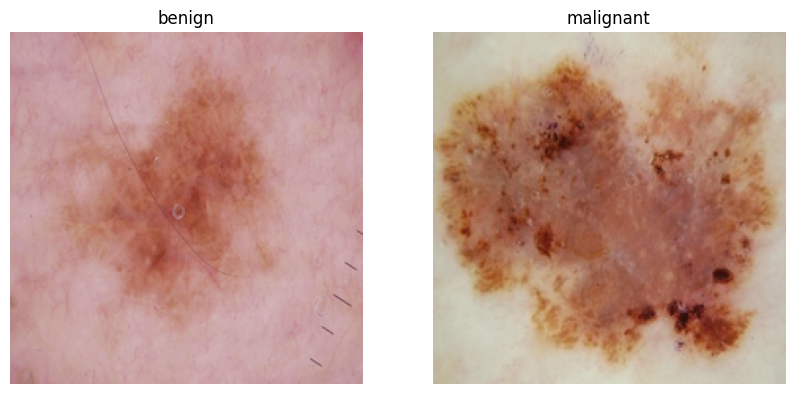

In [17]:
plot_image(class_map)

In [24]:
data_generator=ImageDataGenerator(rescale=1./255,
                                 validation_split=0.2,
                                 rotation_range=40,    
                                 width_shift_range=0.2,    
                                 height_shift_range=0.2,   
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                fill_mode='nearest')

In [25]:
train_data=data_generator.flow_from_directory(data_path,
                                             batch_size=10,
                                             subset='training',
                                             class_mode='categorical',
                                             shuffle=True,
                                              target_size=(224,224)
                                             )

Found 216 images belonging to 2 classes.


In [26]:
test_data=data_generator.flow_from_directory(data_path,
                                             batch_size=10,
                                             subset='validation',
                                             class_mode='categorical',
                                             shuffle=True,
                                              target_size=(224,224)
                                             )

Found 54 images belonging to 2 classes.


In [62]:
model=Sequential()
model.add(Conv2D(64,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(2,activation='sigmoid'))

model.summary()

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [63]:
model.fit(train_data,validation_data=test_data,epochs=5)

Epoch 1/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 431ms/step - accuracy: 0.7887 - loss: 10.6945 - val_accuracy: 0.9074 - val_loss: 0.4286
Epoch 2/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 429ms/step - accuracy: 0.8729 - loss: 0.9626 - val_accuracy: 0.9444 - val_loss: 0.2330
Epoch 3/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 395ms/step - accuracy: 0.8373 - loss: 0.4101 - val_accuracy: 0.9259 - val_loss: 0.2972
Epoch 4/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 395ms/step - accuracy: 0.9128 - loss: 0.2714 - val_accuracy: 0.9630 - val_loss: 0.1608
Epoch 5/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 416ms/step - accuracy: 0.9217 - loss: 0.1511 - val_accuracy: 0.9444 - val_loss: 0.1947


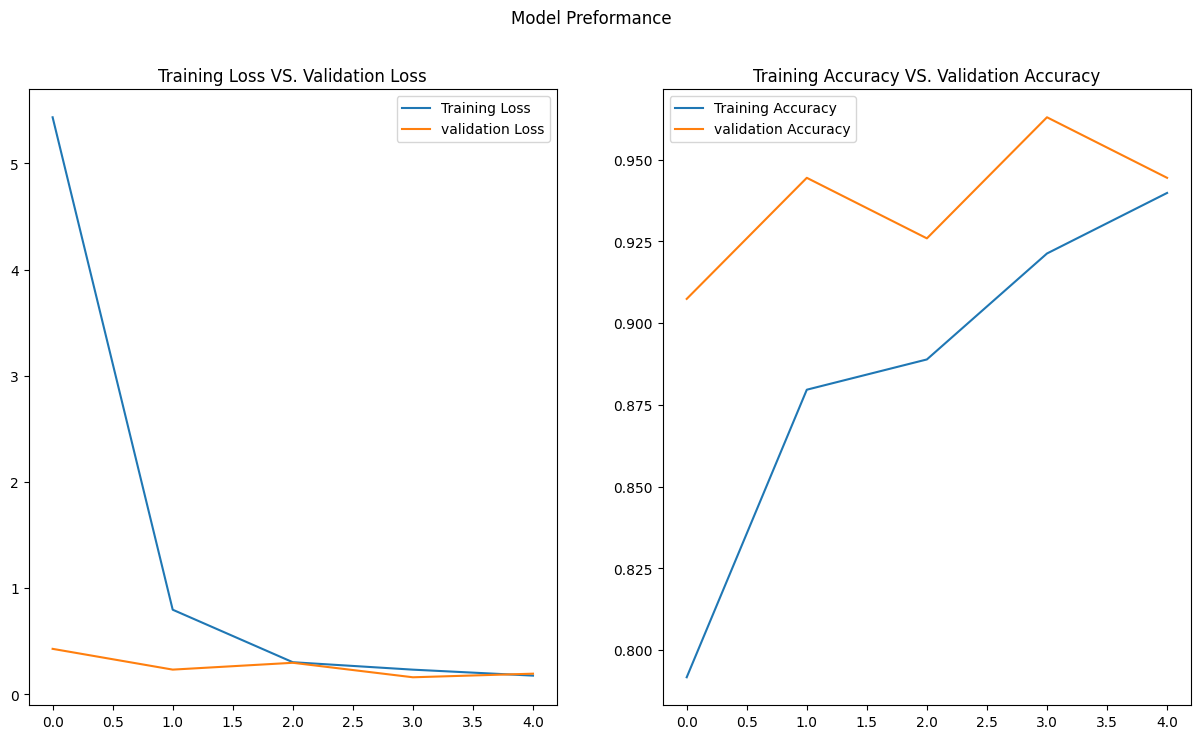

In [64]:
fig,ax=plt.subplots(1,2,figsize=(15,8))
fig.suptitle('Model Preformance')
ax[0].plot(model.history.history['loss'],label='Training Loss')
ax[0].plot(model.history.history['val_loss'],label='validation Loss')
ax[0].set_title('Training Loss VS. Validation Loss')
ax[0].legend()

ax[1].plot(model.history.history['accuracy'],label='Training Accuracy')
ax[1].plot(model.history.history['val_accuracy'],label='validation Accuracy')
ax[1].set_title('Training Accuracy VS. Validation Accuracy')
ax[1].legend()

plt.show()


In [67]:
loss,acc=model.evaluate(train_data)
print(f'Training Accuracy = {acc *100 :.3f}')

22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 205ms/step - accuracy: 0.9696 - loss: 0.1671
Training Accuracy = 98.148


In [68]:
loss,acc=model.evaluate(test_data)
print(f'Testing Accuracy = {acc *100 :.3f}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - accuracy: 0.9565 - loss: 0.1862
Testing Accuracy = 94.444


In [69]:
class_indises=dict([value,key] for key,value in train_data.class_indices.items())
class_indises

{0: 'benign', 1: 'malignant'}

In [80]:
def predicate_model(actual_label,test_image):
    pred_img=image.load_img(test_image,target_size=(224,224))
    pred_img_arr=image.img_to_array(pred_img)/255
    pred_img_reshape=pred_img_arr.reshape((1,pred_img_arr.shape[0],
                                          pred_img_arr.shape[1],
                                          pred_img_arr.shape[2]))
    
    ypred=model.predict(pred_img_reshape)
    ypred_label=np.argmax(ypred)
    predicate_class=class_indises[ypred_label]
    
    plt.figure(figsize=(10,5))
    plt.imshow(pred_img_arr)
    plt.grid()
    plt.axis('off')
    plt.title(f"Actual Label is: {actual_label} | predict label is: {predicate_class}")
    

In [86]:
test_image1='/kaggle/input/skin-cancer-malignant-vs-benign/test/benign/1003.jpg'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


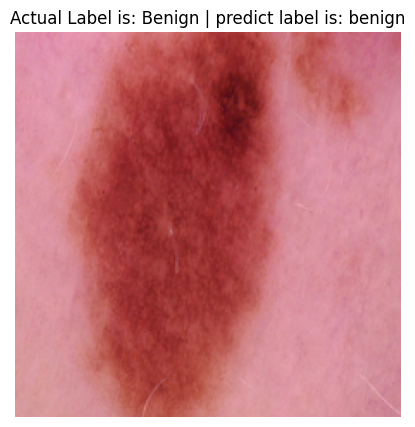

In [87]:
predicate_model('Benign',test_image1)

In [88]:
test_image2='/kaggle/input/skin-cancer-malignant-vs-benign/test/malignant/1027.jpg'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


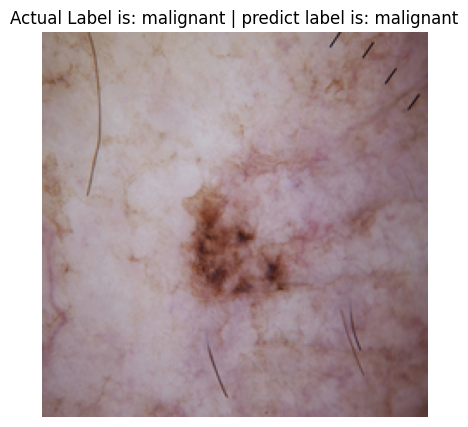

In [89]:
predicate_model('malignant',test_image2)